In [1]:
import logging

logger = logging.getLogger()
logger.handlers.clear()

# format
formatter = logging.Formatter('[%(asctime)s] [%(levelname)s] %(message)s')

# add stream handler
handler = logging.StreamHandler(sys.stdout)                             
handler.setFormatter(formatter)
logger.addHandler(handler)

# enable all logging level
logger.setLevel(logging.INFO)

In [2]:
import os
os.environ['OKFP_ROOT'] = 'C:/Users/sean9/Downloads/FrontPanelUSB'

Definition for the board.

In [3]:
from ece437.ok import OKFrontPanel

path = "C:/Users/sean9/ECE437/Final/Final.runs/impl_1/final_top.bit"
fp = OKFrontPanel(firmware_path=path)

Start talking to CMV300.

In [4]:
from ece437.spi import SPIControllerEndpoints
from ece437.sensor.cmv300 import CMV300Endpoints

SPI_ENDPOINTS = SPIControllerEndpoints(
    RESET = 0x00,
    DATA_IN = 0x01,
    DATA_OUT = 0x20,
    TRIGGER_IN = 0x40,
    TRIGGER_OUT = 0x60,

    RESET_MASK = 0,

    START_MASK = 0,
    MEM_RESET_MASK = 1,
    MEM_WRITE_MASK = 2,
    MEM_READ_MASK = 3,

    DONE_MASK = 0
)

CMV300_ENDPOINTS = CMV300Endpoints(
    RESET = 0x00,
    TRIGGER_IN = 0x41,
    TRIGGER_OUT = 0x61,
    PIPE = 0xA0,

    RESET_MASK = 1,

    START_MASK = 0,

    DONE_MASK = 0
)

Registers

[2022-12-12 01:33:01,297] [INFO] reset SPI controller
[2022-12-12 01:33:01,304] [INFO] serial=1911000P3V
[2022-12-12 01:33:11,317] [INFO] ret=-2


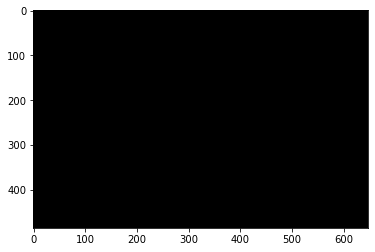

In [10]:
from ece437.spi import SPIController
from ece437.sensor.cmv300 import CMV300
import matplotlib.pyplot as plt

spi = SPIController(fp, SPI_ENDPOINTS)
camera = CMV300(fp, spi, CMV300_ENDPOINTS)

with fp, spi, camera:
    logger.info(f"serial={fp.serial_number}")

    im = camera.get_image()

plt.imshow(im, cmap='gray')
plt.axis('tight');